In [1]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "sakshigoyal7/credit-card-customers"
!unzip credit-card-customers.zip

cp: cannot stat '../kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 59.7MB/s]
Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

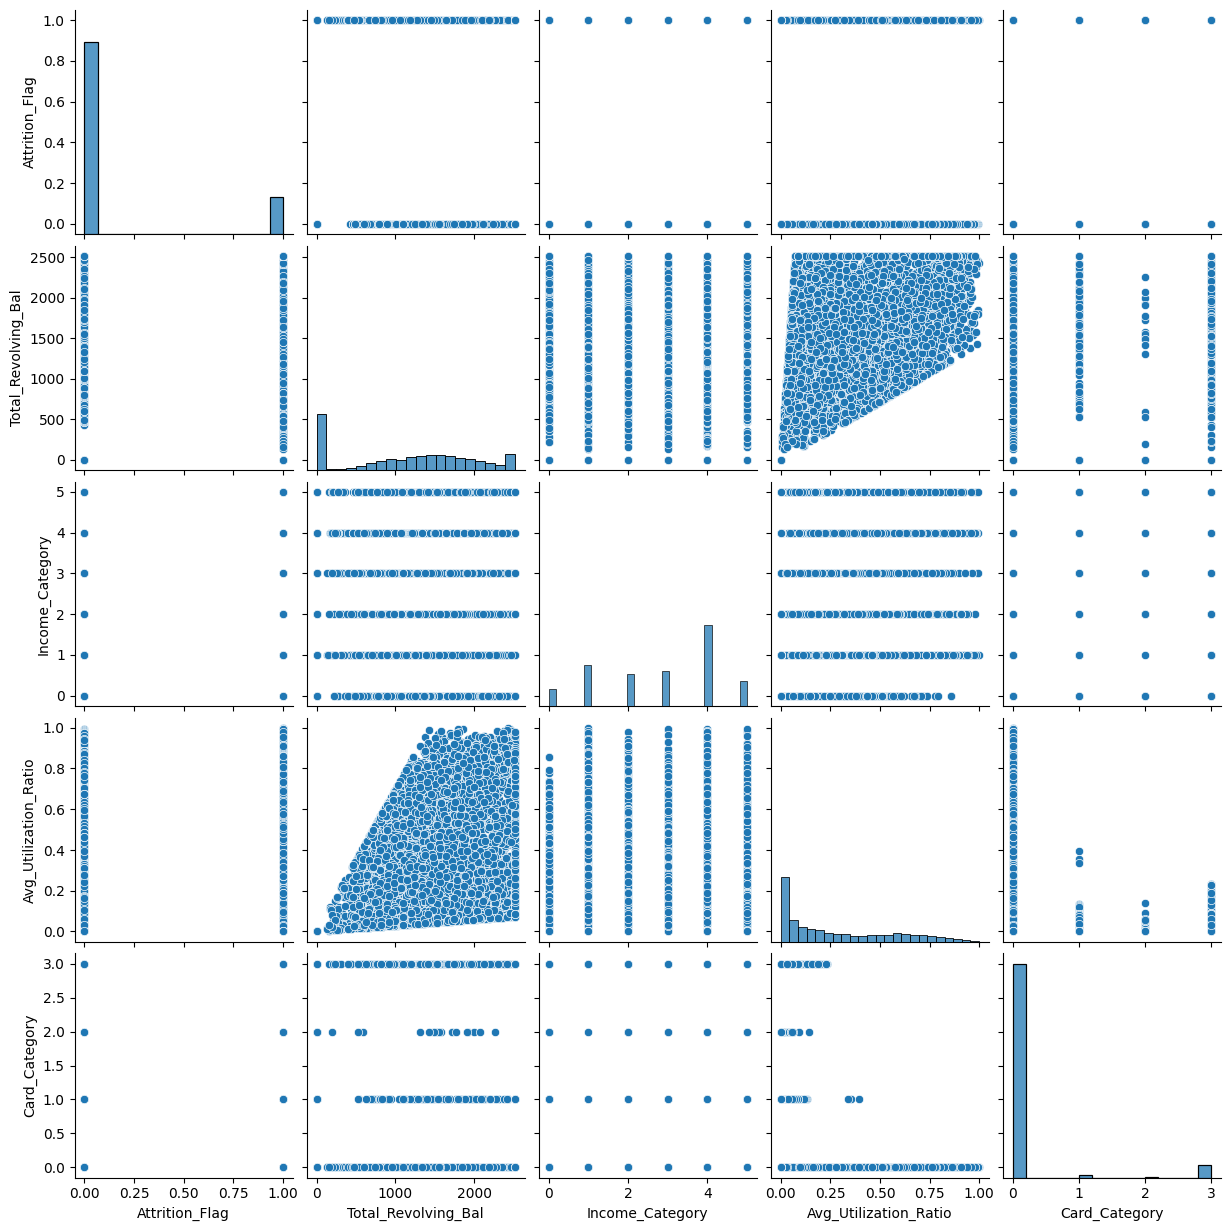

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('BankChurners.csv')

data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

print(data.head())
print(data.info())

data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data['Education_Level'] = data['Education_Level'].map({
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
})
columns_to_encode = ['Marital_Status', 'Income_Category', 'Card_Category']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
sns.pairplot(data[['Attrition_Flag', 'Total_Revolving_Bal', 'Income_Category', 'Avg_Utilization_Ratio', 'Card_Category']])


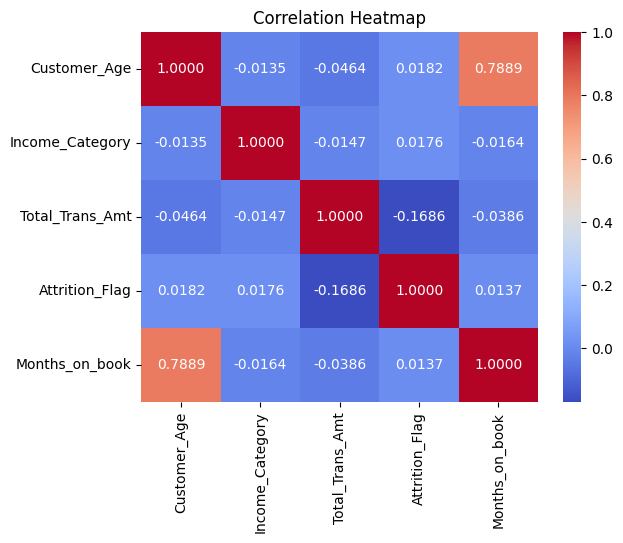

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Customer_Age', 'Income_Category', 'Total_Trans_Amt', 'Attrition_Flag', 'Months_on_book']
correlation_matrix = data[columns_of_interest].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".4f"
)


plt.title("Correlation Heatmap")
plt.show()



In [ ]:
has_missing_values = data.isna().any().any()

if has_missing_values:
    print("DataFrame contains missing values.")
else:
    print("No missing values in the DataFrame.")


No missing values in the DataFrame.


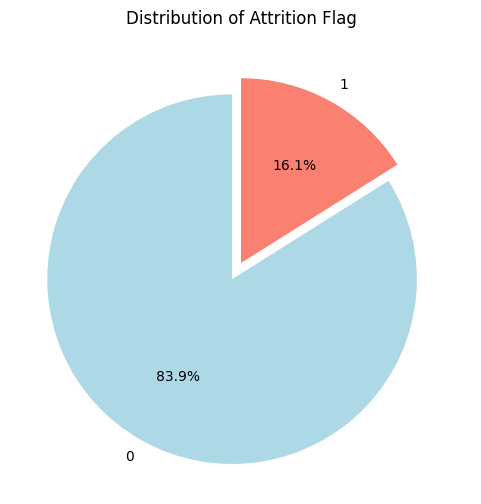

In [ ]:
import matplotlib.pyplot as plt
category_counts = data['Attrition_Flag'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%', startangle=90,      colors=['lightblue', 'salmon'],
    explode=[0.1 if i == 0 else 0 for i in range(len(category_counts))]
)
plt.title("Distribution of Attrition Flag")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data_array = np.array(data)

target = data_array[:, 1]
features = np.delete(data_array, 1, axis=1)

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (10127, 20)
Target shape: (10127,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_temp, Y_train, Y_temp = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=13
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=13
)

print("Training set size:", X_train.shape, Y_train.shape)
print("Test set size:", X_test.shape, Y_test.shape)
print("Validation set size:", X_val.shape, Y_val.shape)

logistic_model = LogisticRegression(
    penalty='l1',
    tol=1e-4,
    solver='liblinear',
    random_state=13
)

logistic_model.fit(X_train, Y_train)

Y_predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predictions)
print("Test accuracy:", accuracy)


Training set size: (8101, 20) (8101,)
Test set size: (1519, 20) (1519,)
Validation set size: (507, 20) (507,)
Test accuracy: 0.9065174456879526


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Y_predictions = logistic_model.predict(X_test)

precision = precision_score(Y_test, Y_predictions, average='weighted')
recall = recall_score(Y_test, Y_predictions, average='weighted')
f1 = f1_score(Y_test, Y_predictions, average='weighted')
accuracy = accuracy_score(Y_test, Y_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.9003942007510561
Recall: 0.9065174456879526
F1 Score: 0.9008455097718403
Accuracy: 0.9065174456879526


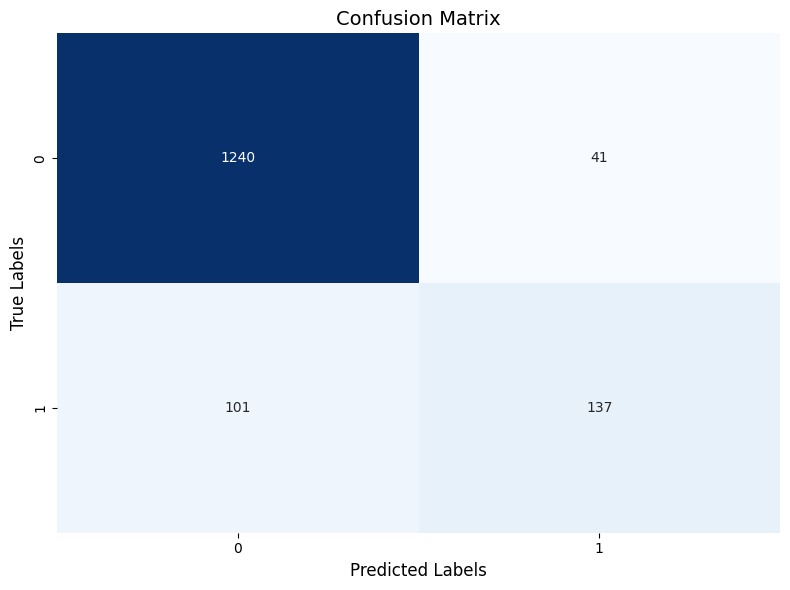

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predictions))


              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1281
         1.0       0.77      0.58      0.66       238

    accuracy                           0.91      1519
   macro avg       0.85      0.77      0.80      1519
weighted avg       0.90      0.91      0.90      1519



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_temp, Y_train, Y_temp = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=13
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=13
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
print("Training set size:", X_train.shape, Y_train.shape)
print("Test set size:", X_test.shape, Y_test.shape)
print("Validation set size:", X_val.shape, Y_val.shape)

logistic_model = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,
    tol=1e-4,
    solver='saga',
    random_state=13
)

logistic_model.fit(X_train, Y_train)

Y_predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predictions)
print("Test accuracy:", accuracy)

print(classification_report(Y_test, Y_predictions))


Training set size: (8101, 20) (8101,)
Test set size: (1519, 20) (1519,)
Validation set size: (507, 20) (507,)
Test accuracy: 0.9045424621461488
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1281
         1.0       0.75      0.58      0.66       238

    accuracy                           0.90      1519
   macro avg       0.84      0.77      0.80      1519
weighted avg       0.90      0.90      0.90      1519



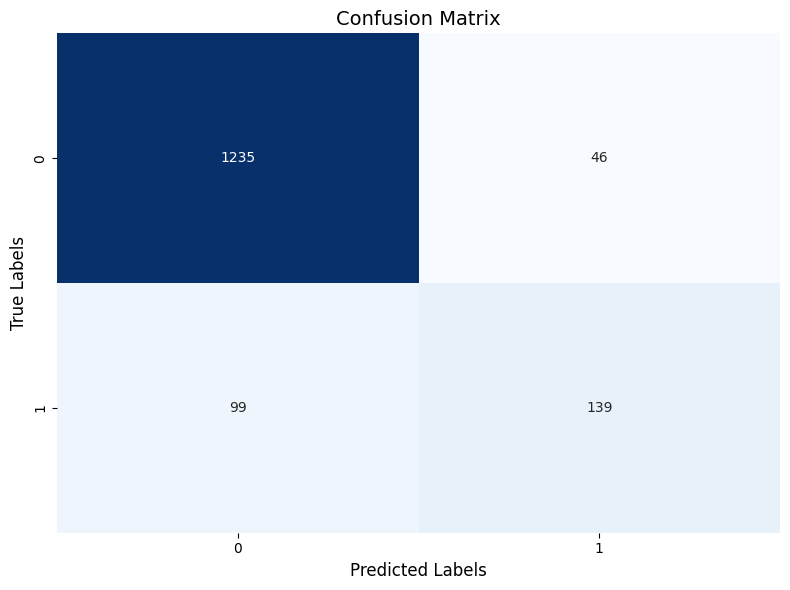

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()


Class distribution after balancing:
Test accuracy: 0.8624094799210007
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.91      1281
         1.0       0.54      0.84      0.66       238

    accuracy                           0.86      1519
   macro avg       0.75      0.85      0.79      1519
weighted avg       0.90      0.86      0.87      1519



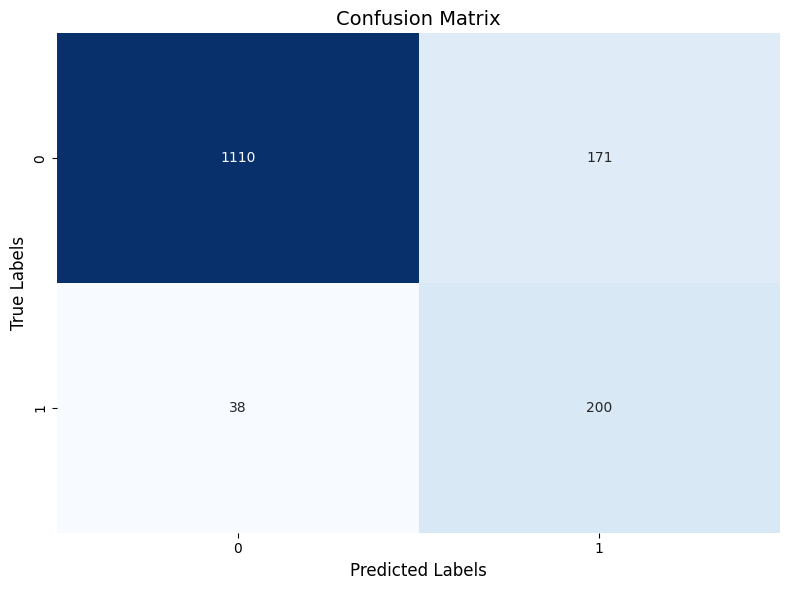

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_temp, Y_train, Y_temp = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=13
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=13
)

smote = SMOTE(random_state=13)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

print("Class distribution after balancing:")


scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

logistic_model = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,
    tol=1e-4,
    solver='saga',
    random_state=13
)

logistic_model.fit(X_train_balanced, Y_train_balanced)

Y_predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predictions)
print("Test accuracy:", accuracy)

print(classification_report(Y_test, Y_predictions))

cm = confusion_matrix(Y_test, Y_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

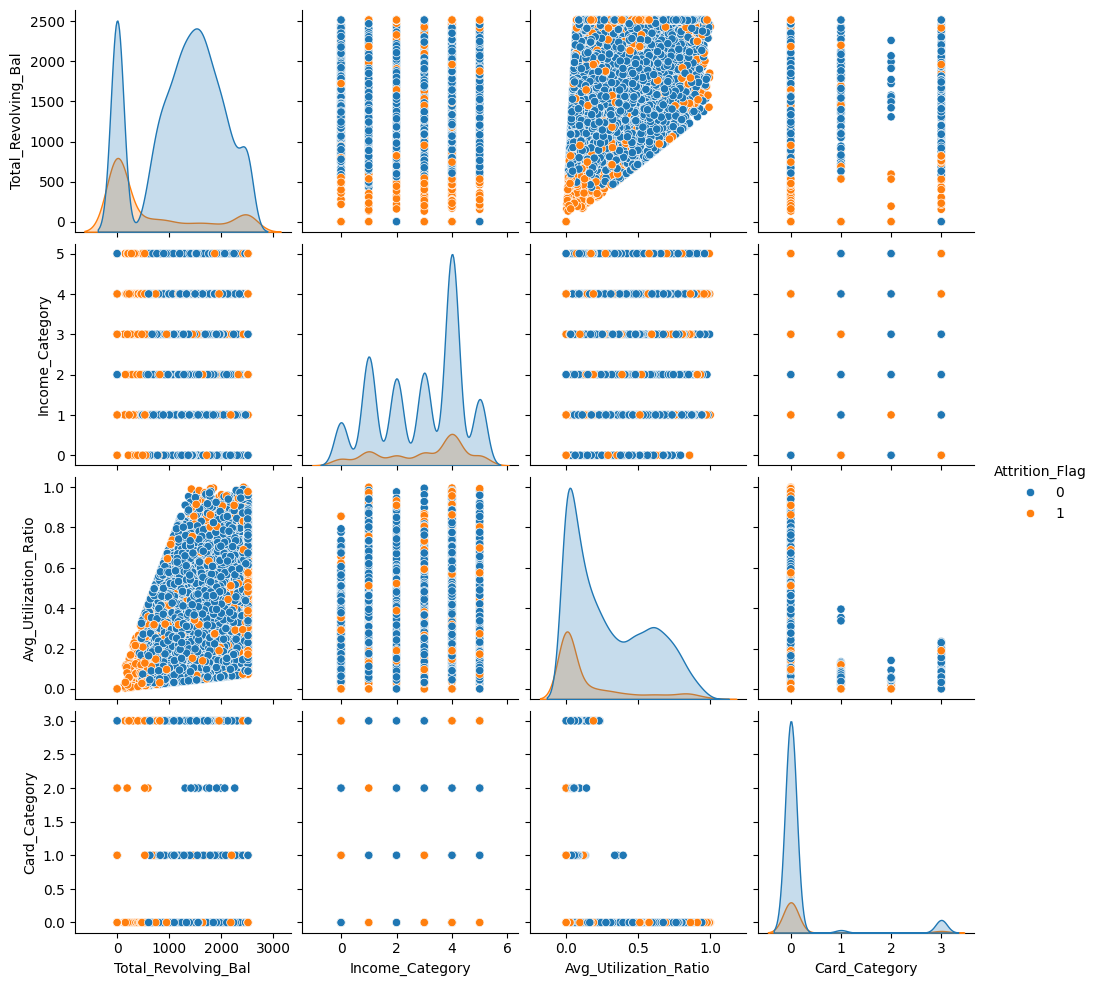

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('BankChurners.csv')

data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

print(data.head())
print(data.info())

data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data['Education_Level'] = data['Education_Level'].map({
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
})

columns_to_encode = ['Marital_Status', 'Income_Category', 'Card_Category']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

sns.pairplot(data[['Attrition_Flag', 'Total_Revolving_Bal', 'Income_Category', 'Avg_Utilization_Ratio', 'Card_Category']], hue='Attrition_Flag')
